# WEEK 4

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c161dc7e14b3be9822d730967fbd5c0d4a4ddb99c51466c64c75fcc2ce90f77d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


## **Apdative control Using Fuzzy Logic For DC Motor And Simulation**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [ ]:
# Create Antecedent variable
e = ctrl.Antecedent(np.linspace(-100,100,360), label = 'e') # error of velocity
de = ctrl.Antecedent(np.linspace(-100,100,360), label ='de') # gradient of error
# Create Consequent variable
u = ctrl.Consequent(np.linspace(-5,5,360), label = 'voltage') # voltage of dc motor

In [ ]:
def membership_func(var):
  range = max(var.universe) - min(var.universe)
  var['LN'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe),min(var.universe) + 0.25*range])
  var['SN'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe) + 0.25*range , min(var.universe) + 0.5*range])
  var['ZO'] = fuzz.trimf(var.universe, [min(var.universe) + 0.25*range ,min(var.universe) + 0.5*range , min(var.universe) + 0.75*range])
  var['SP'] = fuzz.trimf(var.universe, [min(var.universe) + 0.5*range ,min(var.universe) + 0.75*range, max(var.universe)])
  var['LP'] = fuzz.trimf(var.universe, [min(var.universe) + 0.75*range , max(var.universe), max(var.universe)])

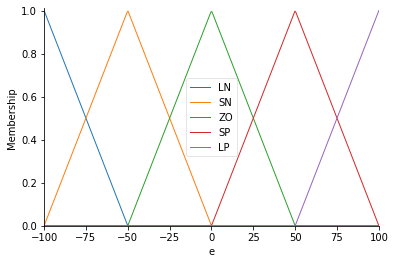

In [ ]:
#Create triangular membership function
membership_func(e)
e.view()

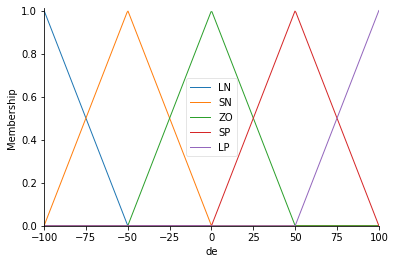

In [ ]:
membership_func(de)
de.view()

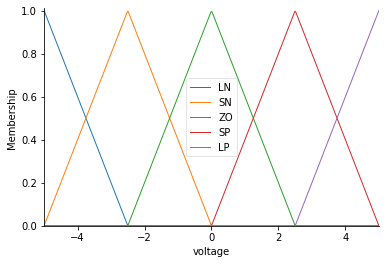

In [ ]:
membership_func(u)
u.view()

In [ ]:
#Create Rule
rule1 = ctrl.Rule(antecedent = e['LN'] & de['LN'], consequent = u['LN'])
rule2 = ctrl.Rule(antecedent = e['LN'] & de['SN'], consequent = u['LN'])
rule3 = ctrl.Rule(antecedent = e['LN'] & de['ZO'], consequent = u['SN'])
rule4 = ctrl.Rule(antecedent = e['LN'] & de['SP'], consequent = u['SN'])
rule5 = ctrl.Rule(antecedent = e['LN'] & de['LN'], consequent = u['SN'])
rule6 = ctrl.Rule(antecedent = e['SN'] & de['LN'], consequent = u['LN'])
rule7 = ctrl.Rule(antecedent = e['SN'] & de['SN'], consequent = u['SN'])
rule8 = ctrl.Rule(antecedent = e['SN'] & de['ZO'], consequent = u['SN'])
rule9 = ctrl.Rule(antecedent = e['SN'] & de['SP'], consequent = u['SN'])
rule10 = ctrl.Rule(antecedent = e['SN'] & de['LP'], consequent = u['ZO'])
rule11 = ctrl.Rule(antecedent = e['ZO'] & de['LN'], consequent = u['SP'])
rule12 = ctrl.Rule(antecedent = e['ZO'] & de['SN'], consequent = u['SN'])
rule13 = ctrl.Rule(antecedent = e['ZO'] & de['ZO'], consequent = u['ZO'])
rule14 = ctrl.Rule(antecedent = e['ZO'] & de['SP'], consequent = u['SP'])
rule15 = ctrl.Rule(antecedent = e['ZO'] & de['LP'], consequent = u['SP'])
rule16 = ctrl.Rule(antecedent = e['SP'] & de['LN'], consequent = u['LP'])
rule17 = ctrl.Rule(antecedent = e['SP'] & de['SN'], consequent = u['SP'])
rule18 = ctrl.Rule(antecedent = e['SP'] & de['ZO'], consequent = u['SP'])
rule19 = ctrl.Rule(antecedent = e['SP'] & de['SP'], consequent = u['LP'])
rule20 = ctrl.Rule(antecedent = e['SP'] & de['LP'], consequent = u['LP'])
rule21 = ctrl.Rule(antecedent = e['LP'] & de['LN'], consequent = u['SP'])
rule22 = ctrl.Rule(antecedent = e['LP'] & de['SN'], consequent = u['SP'])
rule23 = ctrl.Rule(antecedent = e['LP'] & de['ZO'], consequent = u['SP'])
rule24 = ctrl.Rule(antecedent = e['LP'] & de['SP'], consequent = u['LP'])
rule25 = ctrl.Rule(antecedent = e['LP'] & de['LP'], consequent = u['LP'])

In [ ]:
# Create ControlSystem
motor_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
motor_predict = ctrl.ControlSystemSimulation(motor_ctrl)

In [ ]:
motor_predict.inputs({'e':40,'de':10})
motor_predict.compute()
print('Voltage of motor =',motor_predict.output["voltage"])

Voltage of motor = 1.9462713673283931


## **Apdative control Using Fuzzy Logic For Inverted Pendulum**
### - HOMEWORK: SIMULATION

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [ ]:
# Create Antecedent variable
e = ctrl.Antecedent(np.linspace(-90,90,360), label = 'e') # error of angle with respect to verticle direction
de = ctrl.Antecedent(np.linspace(-45,45,360), label ='de') # gradient of error
# Create Consequent variable
F = ctrl.Consequent(np.linspace(-100,100,360), label = 'force') # Force to keep the pendulum balance

In [ ]:
def membership_func(var):
  range = max(var.universe) - min(var.universe)
  var['LN'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe),min(var.universe) + 0.25*range])
  var['SN'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe) + 0.25*range , min(var.universe) + 0.5*range])
  var['ZO'] = fuzz.trimf(var.universe, [min(var.universe) + 0.25*range ,min(var.universe) + 0.5*range , min(var.universe) + 0.75*range])
  var['SP'] = fuzz.trimf(var.universe, [min(var.universe) + 0.5*range ,min(var.universe) + 0.75*range, max(var.universe)])
  var['LP'] = fuzz.trimf(var.universe, [min(var.universe) + 0.75*range , max(var.universe), max(var.universe)])

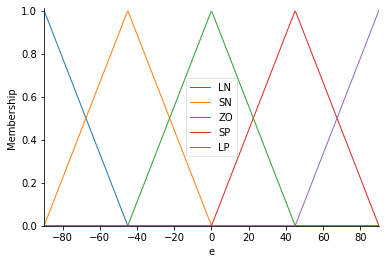

In [ ]:
membership_func(e)
e.view()

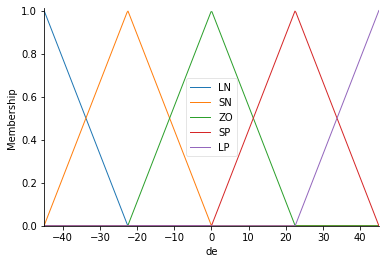

In [ ]:
membership_func(de)
de.view()

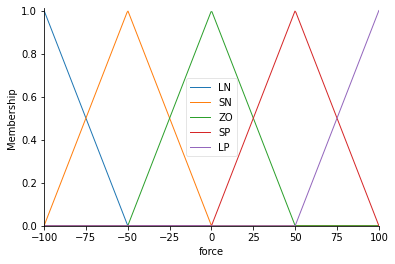

In [ ]:
membership_func(F)
F.view()

In [ ]:
# Create rule
rule1 = ctrl.Rule(antecedent = e['LN'] & de['LN'], consequent = F['LN'])
rule2 = ctrl.Rule(antecedent = e['LN'] & de['SN'], consequent = F['LN'])
rule3 = ctrl.Rule(antecedent = e['LN'] & de['ZO'], consequent = F['SN'])
rule4 = ctrl.Rule(antecedent = e['LN'] & de['SP'], consequent = F['SN'])
rule5 = ctrl.Rule(antecedent = e['LN'] & de['LN'], consequent = F['SN'])
rule6 = ctrl.Rule(antecedent = e['SN'] & de['LN'], consequent = F['LN'])
rule7 = ctrl.Rule(antecedent = e['SN'] & de['SN'], consequent = F['SN'])
rule8 = ctrl.Rule(antecedent = e['SN'] & de['ZO'], consequent = F['SN'])
rule9 = ctrl.Rule(antecedent = e['SN'] & de['SP'], consequent = F['SN'])
rule10 = ctrl.Rule(antecedent = e['SN'] & de['LP'], consequent = F['ZO'])
rule11 = ctrl.Rule(antecedent = e['ZO'] & de['LN'], consequent = F['SP'])
rule12 = ctrl.Rule(antecedent = e['ZO'] & de['SN'], consequent = F['SN'])
rule13 = ctrl.Rule(antecedent = e['ZO'] & de['ZO'], consequent = F['ZO'])
rule14 = ctrl.Rule(antecedent = e['ZO'] & de['SP'], consequent = F['SP'])
rule15 = ctrl.Rule(antecedent = e['ZO'] & de['LP'], consequent = F['SP'])
rule16 = ctrl.Rule(antecedent = e['SP'] & de['LN'], consequent = F['LP'])
rule17 = ctrl.Rule(antecedent = e['SP'] & de['SN'], consequent = F['SP'])
rule18 = ctrl.Rule(antecedent = e['SP'] & de['ZO'], consequent = F['SP'])
rule19 = ctrl.Rule(antecedent = e['SP'] & de['SP'], consequent = F['LP'])
rule20 = ctrl.Rule(antecedent = e['SP'] & de['LP'], consequent = F['LP'])
rule21 = ctrl.Rule(antecedent = e['LP'] & de['LN'], consequent = F['SP'])
rule22 = ctrl.Rule(antecedent = e['LP'] & de['SN'], consequent = F['SP'])
rule23 = ctrl.Rule(antecedent = e['LP'] & de['ZO'], consequent = F['SP'])
rule24 = ctrl.Rule(antecedent = e['LP'] & de['SP'], consequent = F['LP'])
rule25 = ctrl.Rule(antecedent = e['LP'] & de['LP'], consequent = F['LP'])

In [ ]:
# Create ControlSystem
force_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
force_predict = ctrl.ControlSystemSimulation(force_ctrl)

In [ ]:
force_predict.inputs({'e':-20,'de':10})
force_predict.compute()
print('Force =',force_predict.output['force'])

Force = 3.728341310445996e-16


## **Apdative control Using Fuzzy Logic For Mobile Robot with 3 sensors** 
### - HOMEWORK: SIMULATION

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd


Intelligent  controller  for  mobile  robot  enables  the  robot  to  avoid  the  obstacle  and improve  target  seeking  ability.  In  the  absence  of  the  obstacle,  robot  moves  towards  the endpoint (goal), otherwise the robot  will react to the obstacles  and  its  relative position from the goal, based on  the information gained from the sensor located in the  center robot. While moving  towards  the  goal  (with  the  obstacle  avoidance  strategy),  the  robot  changes  it’s angular velocity and linear velocity

Three  triangle  membership  functions considered  for  each    input  of  fuzzy membership functions for distances are: 
- Near. 
- Medium.
- Far

Outputs: The two numerical outputs are fuzzified by the membership functions . These membership functions are defined based on the expert knowledge . 
Three triangle membership functions for velocity are:  
- Small. 
- Medium.
- Big.

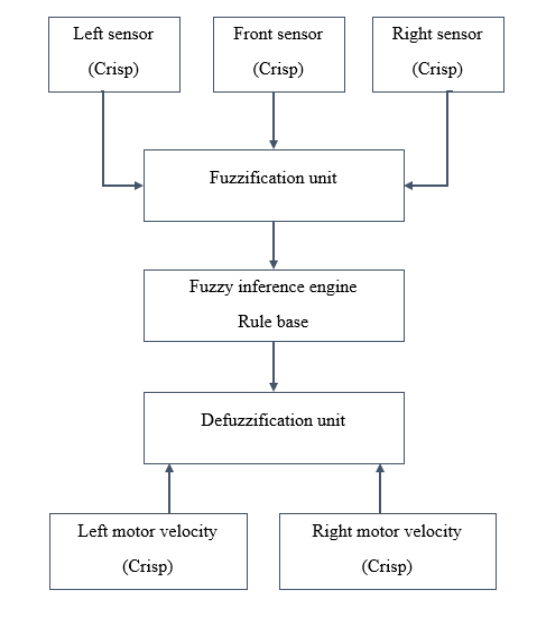

[Fuzzy_Logic_Sensor_Fusion_for_Obstacle_Avoidance_Mobile_Robot](https://www.researchgate.net/publication/327176883_Fuzzy_Logic_Sensor_Fusion_for_Obstacle_Avoidance_Mobile_Robot)

In [ ]:
#define fucntion to initiate input variable
def Antecedent(min,max,space,label):
  return ctrl.Antecedent(np.linspace(min,max,space),label)

# Definr functuin to initiate output variable
def Consequent(min,max,space,label):
  return ctrl.Consequent(np.linspace(min,max,space),label)

#define membership function
def membership_func(var,minimum,medium,maximum):
  range = max(var.universe) - min(var.universe)
  var[minimum] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe),min(var.universe) + 0.5*range])
  var[medium] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe) + 0.5*range , max(var.universe)])
  var[maximum] = fuzz.trimf(var.universe, [min(var.universe) + 0.5*range , max(var.universe), max(var.universe)])

In [ ]:
# Create Antecedent variable
sensors = ['LS', 'FS', 'RS']# Left senor, Front sensor, Right sensor
degrees_input = ['N', 'M', 'F']# Near, Medium, Far 
inputs = {}
for sensor in sensors:
  inputs[sensor] = Antecedent(-0.2,2,1000,sensor)
  membership_func(inputs[sensor],degrees_input[0],degrees_input[1],degrees_input[2])

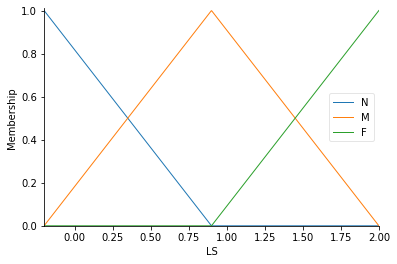

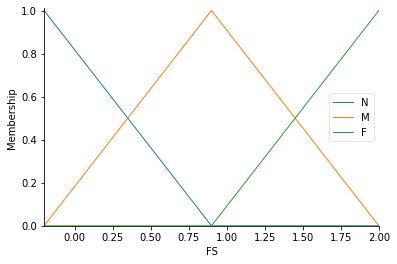

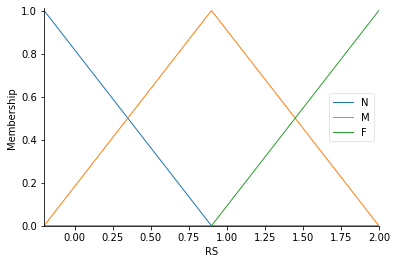

In [ ]:
inputs['LS'].view()
inputs['FS'].view()
inputs['RS'].view()

In [ ]:
# Create Consequent variable
motors_vel = ['VL', 'VR'] # Velocity left, Velocity right
degrees_output = ['S', 'M', 'B'] # Small, Medium. Big
outputs = {}
for motor_vel in motors_vel:
  outputs[motor_vel] = Consequent(-100,100,360,motor_vel)
  membership_func(outputs[motor_vel],degrees_output[0],degrees_output[1],degrees_output[2])

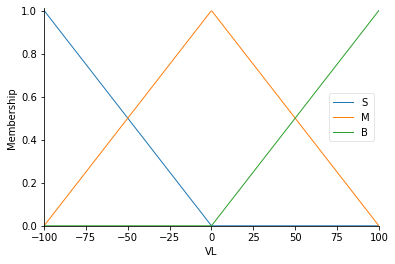

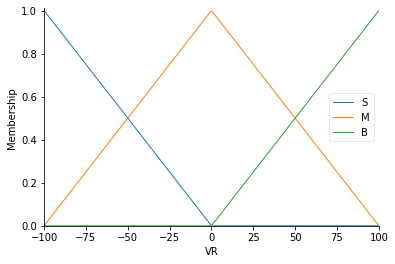

In [ ]:
outputs['VL'].view()
outputs['VR'].view()

**Fuzzy Rule**

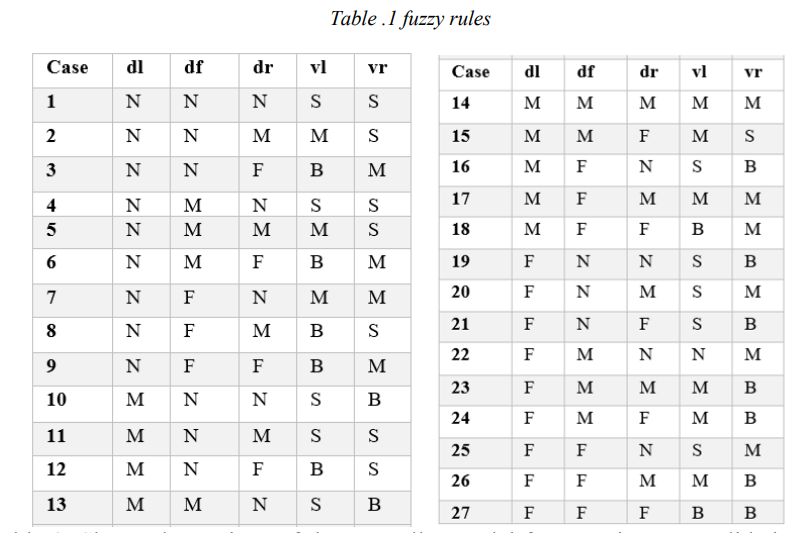

In [ ]:
# Create rule
rules_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Moblie_robot_rule.csv', header=0)
rules_table

,LS,FS,RS,VL,VR
0,N,N,N,S,S
1,N,N,M,M,S
2,N,N,F,B,M
3,N,M,N,S,S
4,N,M,M,M,S
5,N,M,F,B,M
6,N,F,N,M,M
7,N,F,N,M,M
8,N,F,F,B,M
9,M,N,N,S,B


In [ ]:
rules = {}

for index in range(rules_table.shape[0]):
  condition = inputs[sensors[0]][rules_table.loc[index, sensors[0]]]
  for column in range(1, rules_table.shape[1]-2):
    condition = condition & inputs[sensors[column]][rules_table.loc[index, sensors[column]]]
  rules[f'rule{index}'] = ctrl.Rule(antecedent = condition, consequent = outputs['VL'][rules_table.loc[index,'VL']])
  rules[f"rule{index}'"] = ctrl.Rule(antecedent = condition, consequent = outputs['VR'][rules_table.loc[index,'VR']])
display(rules)

{'rule0': IF (LS[N] AND FS[N]) AND RS[N] THEN VL[S]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule0'": IF (LS[N] AND FS[N]) AND RS[N] THEN VR[S]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule1': IF (LS[N] AND FS[N]) AND RS[M] THEN VL[M]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule1'": IF (LS[N] AND FS[N]) AND RS[M] THEN VR[S]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule2': IF (LS[N] AND FS[N]) AND RS[F] THEN VL[B]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule2'": IF (LS[N] AND FS[N]) AND RS[F] THEN VR[M]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule3': IF (LS[N] AND FS[M]) AND RS[N] THEN VL[S]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule3'": IF (LS[N] AND FS[M]) AND RS[N] THEN VR[S]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule4': IF (LS[N] AND FS[M

In [ ]:
# Create control system
rule_left = [rules[f"rule{i}'"] for i in range(int(len(rules)/2))]
rule_right = [rules[f'rule{i}'] for i in range(int(len(rules)/2))]
motors_ctrl = ctrl.ControlSystem(rule_left + rule_right)
motors_predict = ctrl.ControlSystemSimulation(motors_ctrl)

In [ ]:
#Predict  motor's velocity
motors_predict.inputs({'RS':0.2,'FS':0.2,'LS':1.5})
motors_predict.compute()
print("Velocity of left motor =",motors_predict.output['VL'],'RPM')
print("Velocity of right motor =",motors_predict.output['VR'],'RPM')

Velocity of left motor = -17.094930363085247 RPM
Velocity of right motor = 8.69706059668206 RPM


## **Apdative control Using Fuzzy Logic For Water Level Controller** 

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

The controller in present work is a Mamdani based one. It uses a rule base
in linguistic terms. There are two inputs: error in liquid level 

- e(t) =h(t)-hd 

and
rate of change of liquid level e(t)= h(t) and one output parameter: the inlet valve
control angle u(t). Triangular membership functions are selected to fuzzify the inputs and output variables. There are set fuzzy sets taken (N, O and P) for each
of the two inputs and five fuzzy sets for the output variable u

[Water Level Control using Fuzzy Logic System](https://www.researchgate.net/publication/350978546
)

In [ ]:
# Create Antecedent variable
level_error = ctrl.Antecedent(np.linspace(0,100,100), label = 'level_error') # centimet
Dlevel_error = ctrl.Antecedent(np.linspace(0,100,100), label = 'Dlevel_error') # gradient of level error
# Create Consequent variable
valve = ctrl.Consequent(np.linspace(-1,1,100), label = 'valve') # : the inlet valve control angle 


In [ ]:
def membership_func(var):
  range = max(var.universe) - min(var.universe)
  var['negative'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe),min(var.universe) + 0.5*range])
  var['none'] = fuzz.trimf(var.universe, [min(var.universe) ,min(var.universe) + 0.5*range ,max(var.universe)])
  var['positive'] = fuzz.trimf(var.universe, [min(var.universe) + 0.5*range , max(var.universe), max(var.universe)])

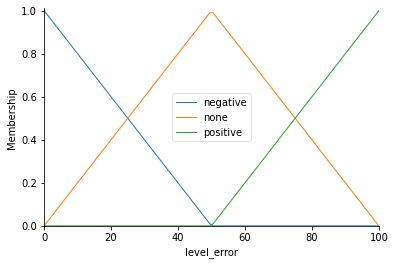

In [ ]:
membership_func(level_error)
level_error.view()

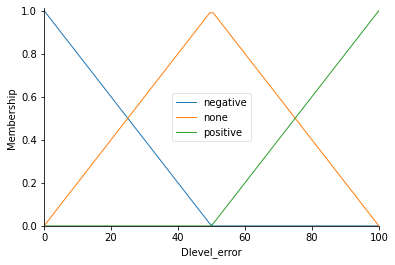

In [ ]:
membership_func(Dlevel_error)
Dlevel_error.view()

In [ ]:
#Create consequent variable
valve['close fast'] = fuzz.trimf(valve.universe, [-1,-0.9,-0.8])
valve['close low'] = fuzz.trimf(valve.universe, [-0.6,-0.5,-0.4])
valve['no change'] = fuzz.trimf(valve.universe, [-0.1,0,0.1])
valve['open low'] = fuzz.trimf(valve.universe, [0.4,0.5,0.6])
valve['open fast'] = fuzz.trimf(valve.universe, [0.8,0.9,1])

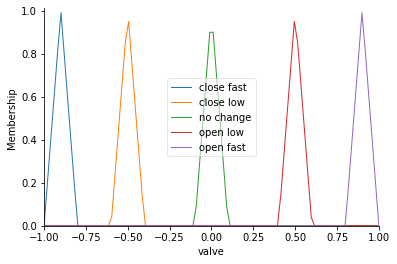

In [ ]:
valve.view()

In [ ]:
#Create rules
rule1 = ctrl.Rule(antecedent = level_error['none'] , consequent = valve['no change'])
rule2 = ctrl.Rule(antecedent = level_error['positive'] , consequent = valve['open fast'])
rule3 = ctrl.Rule(antecedent = level_error['negative'] , consequent = valve['close fast'])
rule4 = ctrl.Rule(antecedent = level_error['none'] & Dlevel_error['positive'], consequent = valve['close low'])
rule5 = ctrl.Rule(antecedent = level_error['none'] & Dlevel_error['negative'], consequent = valve['close fast'])
rule6 = ctrl.Rule(antecedent = level_error['positive'] & Dlevel_error['positive'], consequent = valve['close fast'])

In [ ]:
# Create ControlSystem
valve_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5, rule6])
valve_predict = ctrl.ControlSystemSimulation(valve_ctrl)

In [ ]:
valve_predict.inputs({'level_error':55, 'Dlevel_error':90})
valve_predict.compute()
print('The inlet valve control angle =',valve_predict.output["valve"])

The inlet valve control angle = -0.20579580371819067


# **Analysis and use of fuzzy intelligent technique for navigation of humanoid robot in obstacle prone zone**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

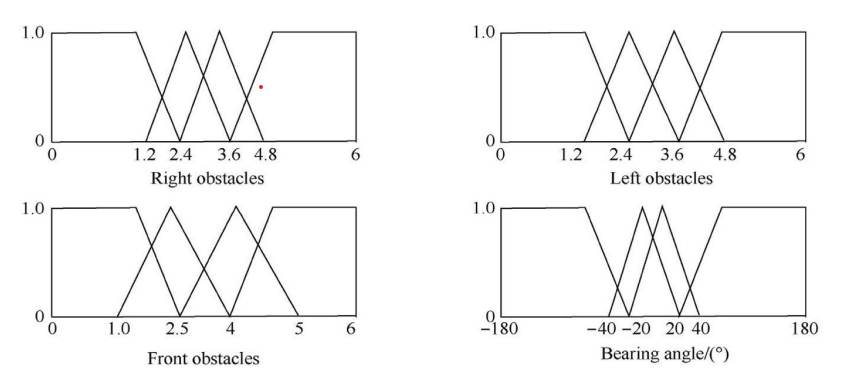
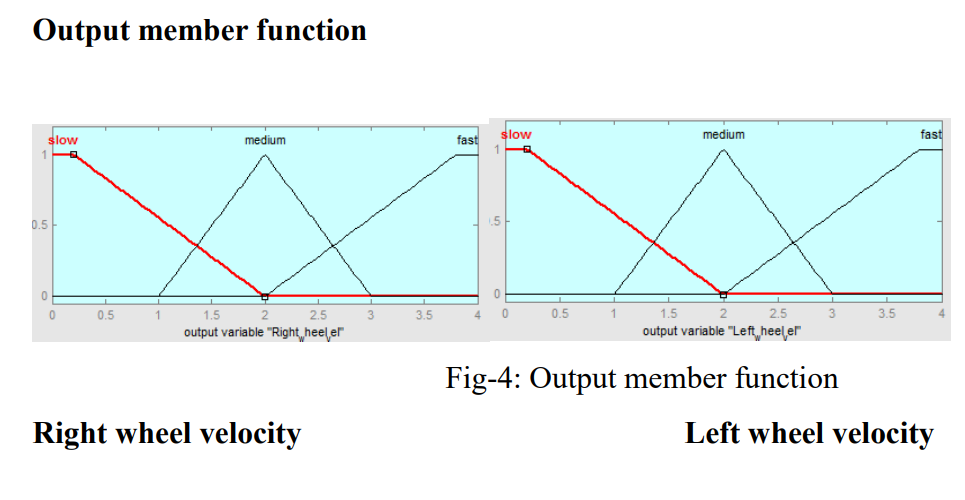

In [ ]:
# Create Antecednt variable
RO = ctrl.Antecedent(np.linspace(0,6,200),'Right obstacles')
LO = ctrl.Antecedent(np.linspace(0,6,200),'Left obstacles')
FO = ctrl.Antecedent(np.linspace(0,6,200),'Front obstacles')
BA = ctrl.Antecedent(np.linspace(-180,180,200),'Bearing angles')
#Create Consequent variable
LV = ctrl.Consequent(np.linspace(0,4,200),'Left velocity')
RV = ctrl.Consequent(np.linspace(0,4,200),'Right velocity')

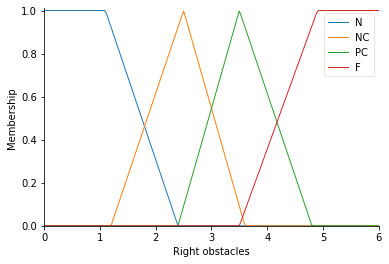

In [ ]:
RO['N'] = fuzz.trapmf(RO.universe, [0,0,1.1,2.4]) # Near
RO['NC'] = fuzz.trimf(RO.universe, [1.2,2.5,3.6]) # Negative Close
RO['PC'] = fuzz.trimf(RO.universe, [2.4,3.5,4.8]) # Positive Close
RO['F'] = fuzz.trapmf(RO.universe, [3.5,4.9,6,6]) # Far
RO.view()

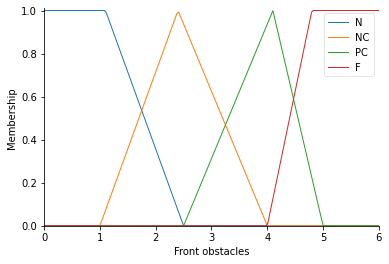

In [ ]:
FO['N'] = fuzz.trapmf(FO.universe, [0,0,1.1,2.5])
FO['NC'] = fuzz.trimf(FO.universe, [1,2.4,4])
FO['PC'] = fuzz.trimf(FO.universe, [2.5,4.1,5])
FO['F'] = fuzz.trapmf(FO.universe, [4,4.8,6,6])
FO.view()

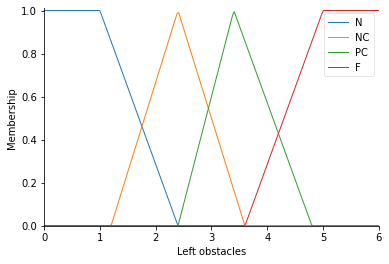

In [ ]:
LO['N'] = fuzz.trapmf(LO.universe, [0,0,1,2.4])
LO['NC'] = fuzz.trimf(LO.universe, [1.2,2.4,3.6])
LO['PC'] = fuzz.trimf(LO.universe, [2.4,3.4,4.8])
LO['F'] = fuzz.trapmf(LO.universe, [3.6,5,6,6])
LO.view()

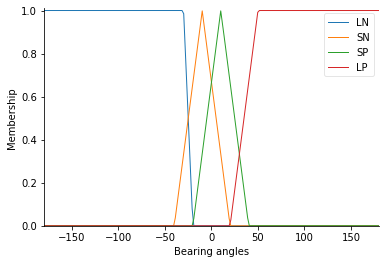

In [ ]:
BA['LN'] = fuzz.trapmf(BA.universe, [-180,-180,-30,-20]) # Large negative
BA['SN'] = fuzz.trimf(BA.universe, [-40,-10,20])# Small negative
BA['SP'] = fuzz.trimf(BA.universe, [-20,10,40])# Small postive
BA['LP'] = fuzz.trapmf(BA.universe, [20,50,180,180])# Large positve
BA.view()

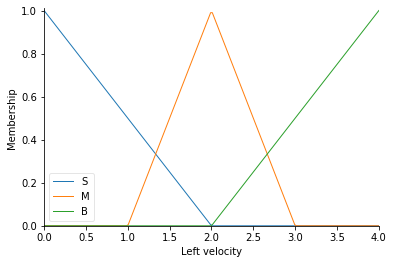

In [ ]:
LV['S'] = fuzz.trimf(LV.universe, [0,0,2]) # SMALL
LV['M'] = fuzz.trimf(LV.universe, [1,2,3]) # MEDIUM
LV['B'] = fuzz.trimf(LV.universe, [2,4,4]) # BIG
LV.view()

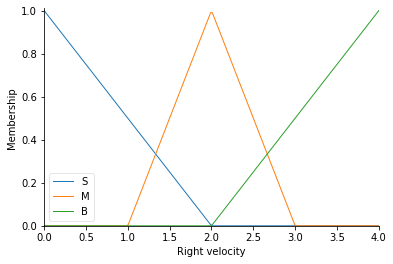

In [ ]:
RV['S'] = fuzz.trimf(RV.universe, [0,0,2]) # SMALL
RV['M'] = fuzz.trimf(RV.universe, [1,2,3]) # MEDIUM
RV['B'] = fuzz.trimf(RV.universe, [2,4,4]) # BIG
RV.view()

In [ ]:
# Create rules
rules_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Humanoid_robot_rule.csv', header=0)
rules_table

,LO,FO,RO,BA,LV,RV
0,N,N,N,LN,S,S
1,N,N,NC,SN,M,S
2,N,N,F,LN,B,M
3,N,NC,N,LN,S,S
4,N,NC,PC,SN,M,S
5,N,PC,F,SP,B,M
6,N,F,N,SP,M,M
7,N,F,N,LN,M,M
8,NC,F,F,LP,B,M
9,NC,NC,N,SP,S,B


In [ ]:
inputs ={'LO': LO, 'RO': RO, 'FO': FO, 'BA': BA,}
outputs = {'LV': LV, 'RV': RV}

In [ ]:
sensors = ['LO','FO','RO','BA']
rules = {}
for index in range(rules_table.shape[0]):
  condition = inputs[sensors[0]][rules_table.loc[index, sensors[0]]]
  for column in range(1, rules_table.shape[1]-2):
    condition = condition & inputs[sensors[column]][rules_table.loc[index, sensors[column]]]
  rules[f'rule{index}'] = ctrl.Rule(antecedent = condition, consequent = outputs['LV'][rules_table.loc[index,'LV']])
  rules[f"rule{index}'"] = ctrl.Rule(antecedent = condition, consequent = outputs['RV'][rules_table.loc[index,'RV']])
#display(rules)

In [ ]:
# Create control system
rule_left = [rules[f"rule{i}'"] for i in range(int(len(rules)/2))]
rule_right = [rules[f'rule{i}'] for i in range(int(len(rules)/2))]
motors_ctrl = ctrl.ControlSystem(rule_left + rule_right)
motors_predict = ctrl.ControlSystemSimulation(motors_ctrl)

In [ ]:
#Predict  motor's velocity
motors_predict.inputs({'Right obstacles':4,'Front obstacles':2.3,'Left obstacles':1, 'Bearing angles':-50})
motors_predict.compute()
print("Velocity of left motor =",motors_predict.output['Left velocity'])
print("Velocity of right motor =",motors_predict.output['Right velocity'])

Velocity of left motor = 3.069495274831845
Velocity of right motor = 1.999999999999995


# **Fuzzy Logic Based Control for Autonomous Mobile Robot Navigation**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [ ]:
# Create antencedent variable
distance = ctrl.Antecedent(np.linspace(0,500,2000), label = 'distance') # unit: mm
angle = ctrl.Antecedent(np.linspace(-180,180,2000), label = 'angle') # unit: mm
# Create consequent variable
VL = ctrl.Consequent(np.linspace(0,70,700), label = 'Velocity left')
VR = ctrl.Consequent(np.linspace(0,70,700), label = 'Velocity right')


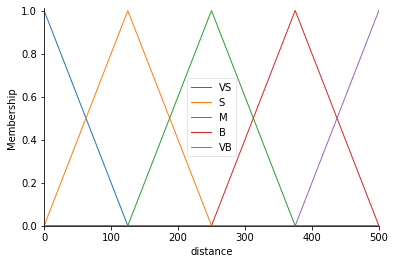

In [ ]:
# Create membership function
distance['VS'] = fuzz.trimf(distance.universe, [0,0,125]) # Very small
distance['S'] = fuzz.trimf(distance.universe, [0,125,250]) # Small
distance['M'] = fuzz.trimf(distance.universe, [125,250,375]) # Medium
distance['B'] = fuzz.trimf(distance.universe, [250,375,500]) # Big
distance['VB'] = fuzz.trimf(distance.universe, [375,500,500]) # Very Big
distance.view()

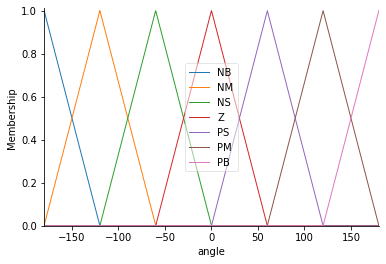

In [ ]:
angle['NB'] = fuzz.trimf(angle.universe, [-180,-180,-120]) # negative big
angle['NM'] = fuzz.trimf(angle.universe, [-180,-120,-60]) # negative medium 
angle['NS'] = fuzz.trimf(angle.universe, [-120,-60,0]) # negative small
angle['Z'] = fuzz.trimf(angle.universe, [-60,0,60]) # zero
angle['PS'] = fuzz.trimf(angle.universe, [0,60,120]) # postive small
angle['PM'] = fuzz.trimf(angle.universe, [60,120,180]) # postive medium
angle['PB'] = fuzz.trimf(angle.universe, [120,180,180]) # postive big
angle.view()

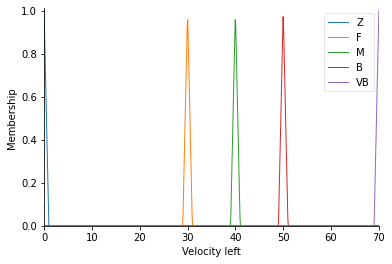

In [ ]:
# Create membership for consequent
VL['Z'] = fuzz.trimf(VL.universe, [0,0,1])
VL['F'] = fuzz.trimf(VL.universe, [29,30,31])
VL['M'] = fuzz.trimf(VL.universe, [39,40,41])
VL['B'] = fuzz.trimf(VL.universe, [49,50,51])
VL['VB'] = fuzz.trimf(VL.universe, [69,70,70])
VL.view()

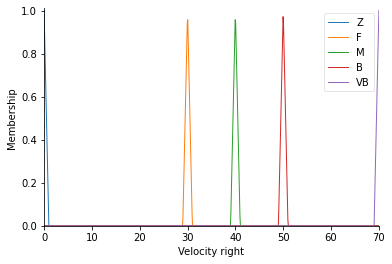

In [ ]:
# Create membership for consequent
VR['Z'] = fuzz.trimf(VL.universe, [0,0,1])
VR['F'] = fuzz.trimf(VL.universe, [29,30,31])
VR['M'] = fuzz.trimf(VL.universe, [39,40,41])
VR['B'] = fuzz.trimf(VL.universe, [49,50,51])
VR['VB'] = fuzz.trimf(VL.universe, [69,70,70])
VR.view()

In [ ]:
# Create rule 
dis_degrees = ['VS','S','M','B','VB']
rules_table_VL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Navigation_Control_rules_VelocityLeft.csv', header = 0)
rules_table_VL.index = dis_degrees
rules_table_VL

,NB,NM,NS,Z,PS,PM,PB
VS,Z,Z,Z,F,F,F,M
S,Z,Z,Z,F,M,B,VB
M,Z,Z,Z,M,B,VB,VB
B,Z,Z,Z,B,VB,VB,VB
VB,Z,Z,Z,VB,VB,VB,VB


In [ ]:
dis_degrees = ['VS','S','M','B','VB']
rules_table_VR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Navigation_Control_rules_VelocityRight.csv', header = 0)
rules_table_VR.index = dis_degrees
rules_table_VR

,NB,NM,NS,Z,PS,PM,PB
VS,B,M,F,F,Z,Z,Z
S,VB,B,M,F,Z,Z,Z
M,VB,VB,B,M,Z,Z,Z
B,VB,VB,VB,B,Z,Z,Z
VB,VB,VB,VB,VB,Z,Z,Z


In [ ]:
angle_degrees = ['NB','NM','NS','Z','PS','PM','PB']
rules = {}
i = 0
for index in dis_degrees:
  for column in angle_degrees:
    rules[f'rule{i}'] = ctrl.Rule(antecedent = angle[column] & distance[index], consequent = VL[rules_table_VL.loc[index,column]])
    rules[f"rule{i}'"] = ctrl.Rule(antecedent = angle[column] & distance[index], consequent = VR[rules_table_VR.loc[index,column]])
    i += 1
display(rules)

{'rule0': IF angle[NB] AND distance[VS] THEN Velocity left[Z]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule0'": IF angle[NB] AND distance[VS] THEN Velocity right[B]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule1': IF angle[NM] AND distance[VS] THEN Velocity left[Z]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule1'": IF angle[NM] AND distance[VS] THEN Velocity right[M]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule2': IF angle[NS] AND distance[VS] THEN Velocity left[Z]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule2'": IF angle[NS] AND distance[VS] THEN Velocity right[F]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule3': IF angle[Z] AND distance[VS] THEN Velocity left[F]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule3'": IF angle[Z] AND distance[VS] THEN Velocity right[F]
 	AND aggregati

In [ ]:
# Create control system
rule_left = [rules[f"rule{i}'"] for i in range(int(len(rules)/2))]
rule_right = [rules[f'rule{i}'] for i in range(int(len(rules)/2))]
motors_ctrl = ctrl.ControlSystem(rule_left + rule_right)
motors_predict = ctrl.ControlSystemSimulation(motors_ctrl)

In [ ]:
#Predict  motor's velocity
motors_predict.inputs({'angle':120,'distance':10})
motors_predict.compute()
print("Velocity of left motor =",motors_predict.output['Velocity left'])
print("Velocity of right motor =",motors_predict.output['Velocity right'])

Velocity of left motor = 32.72172223046456
Velocity of right motor = 0.33539849236086744


# **Fuzzy logic techniques for navigation of several mobile robots**

In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [53]:
inputs = {}
# Create Antecedent variable
inputs['LO'] = ctrl.Antecedent(np.linspace(0,6,500), label = 'LO') # Left obstacles
inputs['RO'] = ctrl.Antecedent(np.linspace(0,6,500), label = 'RO') # Right obstacles
inputs['FO'] = ctrl.Antecedent(np.linspace(0,6,500), label = 'FO') # Front obstacles

outputs = {}
# Create consequent variable
outputs['LV'] = ctrl.Consequent(np.linspace(0,3,500), label = 'LV') # Left Velocity
outputs['RV'] = ctrl.Consequent(np.linspace(0,3,500), label = 'RV') # Right Velocity

In [54]:
def membership_func(var, minimum, maximum,degrees):
  range = (maximum - minimum)/6
  var[degrees[0]] = fuzz.gaussmf(var.universe,range,0.3) # Very near
  var[degrees[1]] = fuzz.gaussmf(var.universe,2*range,0.3) # Near
  var[degrees[2]] = fuzz.gaussmf(var.universe,3*range,0.3) # Medium
  var[degrees[3]] = fuzz.gaussmf(var.universe,4*range,0.3) # Far
  var[degrees[4]] = fuzz.gaussmf(var.universe,5*range,0.3) # Very far


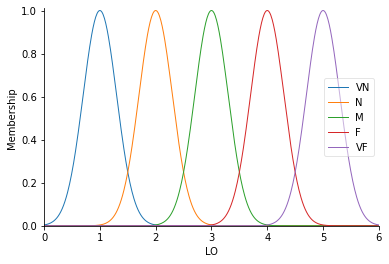

In [55]:
degrees_input = ['VN','N','M','F','VF']
membership_func(inputs['LO'],0,6,degrees_input)
inputs['LO'].view()

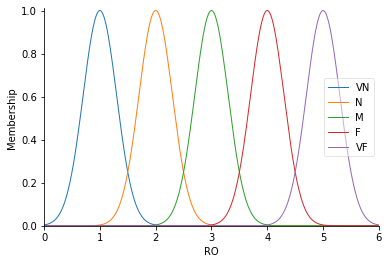

In [56]:
membership_func(inputs['RO'],0,6,degrees_input)
inputs['RO'].view()

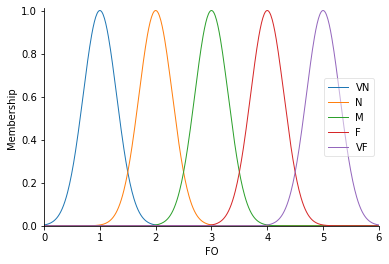

In [57]:
membership_func(inputs['FO'],0,6,degrees_input)
inputs['FO'].view()

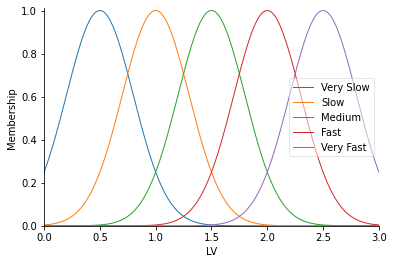

In [58]:
degrees_output = ['Very Slow','Slow','Medium','Fast','Very Fast']
membership_func(outputs['LV'],0,3,degrees_output)
outputs['LV'].view()

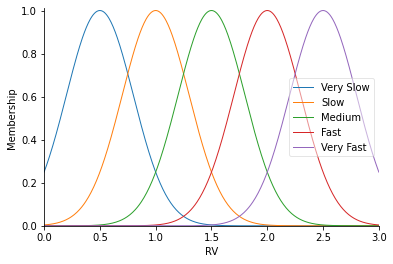

In [59]:
membership_func(outputs['RV'],0,3,degrees_output)
outputs['RV'].view()

In [60]:
# Create rules
rules_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/navigation_of_several_mobile_robots.csv', header=0)
rules_table

,LO,FO,RO,LV,RV
0,N,N,N,Slow,Slow
1,N,N,M,Medium,Slow
2,N,N,F,Fast,Slow
3,N,M,N,Slow,Slow
4,N,M,M,Fast,Medium
5,N,M,F,Fast,Slow
6,N,F,N,Slow,Slow
7,N,F,M,Fast,Medium
8,N,F,F,Fast,Slow
9,M,N,N,Medium,Fast


In [61]:
sensors = ['LO','FO','RO']
rules = {}
for index in range(rules_table.shape[0]):
  condition = inputs[sensors[0]][rules_table.loc[index, sensors[0]]]
  for column in range(1, rules_table.shape[1]-2):
    condition = condition & inputs[sensors[column]][rules_table.loc[index, sensors[column]]]
  rules[f'rule{index}'] = ctrl.Rule(antecedent = condition, consequent = outputs['LV'][rules_table.loc[index,'LV']])
  rules[f"rule{index}'"] = ctrl.Rule(antecedent = condition, consequent = outputs['RV'][rules_table.loc[index,'RV']])
rules

{'rule0': IF (LO[N] AND FO[N]) AND RO[N] THEN LV[Slow]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule0'": IF (LO[N] AND FO[N]) AND RO[N] THEN RV[Slow]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule1': IF (LO[N] AND FO[N]) AND RO[M] THEN LV[Medium]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule1'": IF (LO[N] AND FO[N]) AND RO[M] THEN RV[Slow]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule2': IF (LO[N] AND FO[N]) AND RO[F] THEN LV[Fast]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule2'": IF (LO[N] AND FO[N]) AND RO[F] THEN RV[Slow]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule3': IF (LO[N] AND FO[M]) AND RO[N] THEN LV[Slow]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 "rule3'": IF (LO[N] AND FO[M]) AND RO[N] THEN RV[Slow]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 '

In [62]:
# Create control system
rule_left = [rules[f"rule{i}'"] for i in range(int(len(rules)/2))]
rule_right = [rules[f'rule{i}'] for i in range(int(len(rules)/2))]
motors_ctrl = ctrl.ControlSystem(rule_left + rule_right)
motors_predict = ctrl.ControlSystemSimulation(motors_ctrl)

In [63]:
#Predict  motor's velocity
motors_predict.inputs({'RO':2,'FO':2,'LO':5.5})
motors_predict.compute()
print("Velocity of left motor =",motors_predict.output['LV'])
print("Velocity of right motor =",motors_predict.output['RV'])

Velocity of left motor = 0.7946008242888447
Velocity of right motor = 2.2053991757111393


# **Implementation Using a MATLAB-Based Rapid Prototyping System For Mobile Robot**

In [98]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [97]:
# Create Antecendent variables
Dist = ctrl.Antecedent(np.linspace(0,700,7000), label ='distance') # Distance
Dir = ctrl.Antecedent(np.linspace(-1,1,500), label = 'direction') # Direction
Delta = ctrl.Antecedent(np.linspace(-1,1,100), label = 'delta index') # delta index
sensor_order = ['s0','s1','s2','s3','s4','s5']
sensors ={}
for sensor in sensor_order:
  sensors[sensor] = ctrl.Antecedent(np.linspace(0,1,500), label = sensor) # Sensor
# Create consequent variables
LV = ctrl.Consequent(np.linspace(-5,10,500), label = 'Left velocity') # Left velocity
RV = ctrl.Consequent(np.linspace(-5,10,500), label = 'Right velocity') # Right velocity

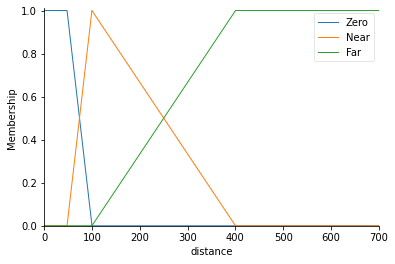

In [99]:
# Create membership function
Dist['Zero'] = fuzz.trapmf(Dist.universe,[0,0,48,100])
Dist['Near'] = fuzz.trimf(Dist.universe,[48,100,400])
Dist['Far'] = fuzz.trapmf(Dist.universe,[100,400,700,700])
Dist.view()

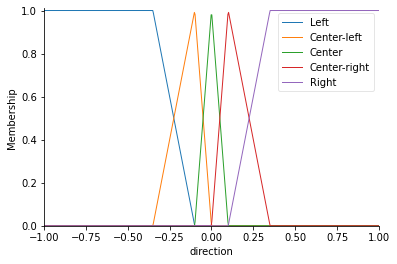

In [100]:
Dir['Left'] = fuzz.trapmf(Dir.universe, [-1,-1,-0.35,-0.1])
Dir['Center-left'] = fuzz.trimf(Dir.universe,[-0.35,-0.1,0])
Dir['Center'] = fuzz.trimf(Dir.universe,[-0.1,0,0.1])
Dir['Center-right'] = fuzz.trimf(Dir.universe,[0,0.1,0.35])
Dir['Right'] = fuzz.trapmf(Dir.universe,[0.1,0.35,1,1])
Dir.view()

In [101]:
def membership_sensor(Sensor):
  Sensor['Far'] = fuzz.trapmf(Sensor.universe, [0,0,0.2,0.3])
  Sensor['Approaching'] = fuzz.trimf(Sensor.universe,[0.2,0.3,0.4])
  Sensor['Close'] = fuzz.trimf(Sensor.universe,[0.3,0.45,0.6])
  Sensor['Colliding'] = fuzz.trapmf(Sensor.universe,[0.5,0.75,1,1])
for sensor in sensor_order:
  membership_sensor(sensors[sensor])

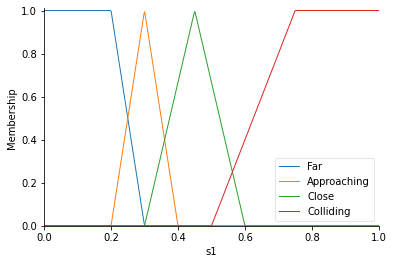

In [102]:
sensors['s1'].view()

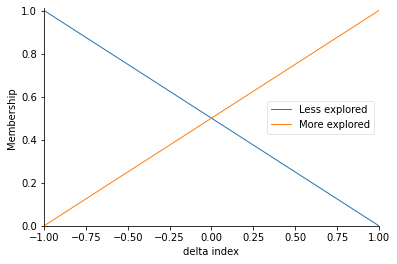

In [103]:
Delta['Less explored'] = fuzz.trimf(Delta.universe,[-1,-1,1])
Delta['More explored'] = fuzz.trimf(Delta.universe,[-1,1,1])
Delta.view()

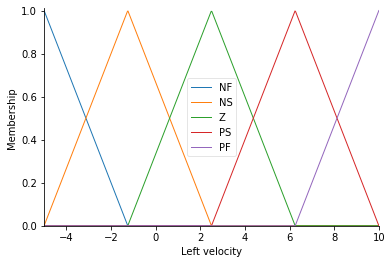

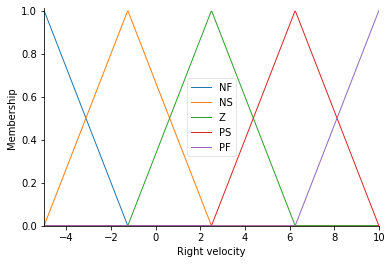

In [104]:
def membership_func(var):
  range = max(var.universe) - min(var.universe)
  var['NF'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe),min(var.universe) + 0.25*range]) # Negative Fast
  var['NS'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe) + 0.25*range , min(var.universe) + 0.5*range]) # Negative Slow
  var['Z'] = fuzz.trimf(var.universe, [min(var.universe) + 0.25*range ,min(var.universe) + 0.5*range , min(var.universe) + 0.75*range]) # Zero
  var['PS'] = fuzz.trimf(var.universe, [min(var.universe) + 0.5*range ,min(var.universe) + 0.75*range, max(var.universe)]) # Positive Slow
  var['PF'] = fuzz.trimf(var.universe, [min(var.universe) + 0.75*range , max(var.universe), max(var.universe)]) # Postive Fast
membership_func(LV)
LV.view()
membership_func(RV)
RV.view()

In [105]:
# Create rule
rule_right = []
rule_right.append(ctrl.Rule(antecedent = Dir['Center'] | Dir['Center-right'], consequent = RV['PS']))
rule_right.append(ctrl.Rule(antecedent = (Dist['Far'] & Dir['Center']) | Dir['Right'], consequent = RV['PF']))
rule_right.append(ctrl.Rule(antecedent =Dir['Center-left'], consequent = RV['NS']))
rule_right.append(ctrl.Rule(antecedent =Dir['Left'], consequent= RV['NF']))
rule_right.append(ctrl.Rule(antecedent =(sensors['s0']['Colliding'] & sensors['s1']['Colliding'] & sensors['s2']['Colliding']) | (sensors['s0']['Close'] & sensors['s1']['Approaching']), consequent= RV['NF']))
rule_right.append(ctrl.Rule(antecedent =sensors['s3']['Colliding'] & sensors['s4']['Colliding'] & sensors['s5']['Colliding'], consequent= RV['Z']))
rule_right.append(ctrl.Rule(antecedent =sensors['s5']['Close'] & sensors['s4']['Approaching'], consequent= RV['PS']))
rule_right.append(ctrl.Rule(antecedent =sensors['s0']['Far'] & sensors['s1']['Far'] & sensors['s2']['Far'] & sensors['s3']['Far'] & sensors['s4']['Far'] & sensors['s5']['Far'], consequent= RV['PF']))

In [106]:
rule_left = []
rule_left.append(ctrl.Rule(antecedent = (Dist['Near'] & Dir['Center']) | Dir['Center-left'], consequent = LV['PS']))
rule_left.append(ctrl.Rule(antecedent = (Dist['Far'] & Dir['Center']) | Dir['Left'], consequent = LV['PF']))
rule_left.append(ctrl.Rule(antecedent = Dir['Center-right'], consequent = LV['NS']))
rule_left.append(ctrl.Rule(antecedent = Dir['Right'], consequent = LV['NF']))
rule_left.append(ctrl.Rule(antecedent = Dist['Zero'] , consequent = LV['Z']))
rule_left.append(ctrl.Rule(antecedent =(sensors['s0']['Colliding'] & sensors['s1']['Colliding'] & sensors['s2']['Colliding']), consequent= LV['Z']))
rule_left.append(ctrl.Rule(antecedent =(sensors['s3']['Colliding'] & sensors['s4']['Colliding'] & sensors['s5']['Colliding']) |(sensors['s5']['Close'] & sensors['s4']['Approaching']), consequent= LV['NF']))
rule_left.append(ctrl.Rule(antecedent =sensors['s0']['Close'] & sensors['s1']['Approaching'], consequent= LV['PS']))
rule_left.append(ctrl.Rule(antecedent =sensors['s0']['Far'] & sensors['s1']['Far'] & sensors['s2']['Far'] & sensors['s3']['Far'] & sensors['s4']['Far'] & sensors['s5']['Far'], consequent= LV['PF']))

In [107]:
# Create control system
motors_ctrl = ctrl.ControlSystem(rule_left + rule_right)
motors_predict = ctrl.ControlSystemSimulation(motors_ctrl)

In [112]:
#Predict  motor's velocity
motors_predict.inputs({'direction':0.8,'s0':0.5, 's1':0.7, 's2':0.3,'s3':0.8,'s4':0.1,'s5':0.9,'distance':600})
motors_predict.compute()
print("Velocity of left motor =",motors_predict.output['Left velocity'])
print("Velocity of right motor =",motors_predict.output['Right velocity'])

Velocity of left motor = -3.7499699403626456
Velocity of right motor = 8.749969940362645
